Adopted from GDELT Data Wrangle by James Houghton https://nbviewer.jupyter.org/github/JamesPHoughton/Published_Blog_Scripts/blob/master/GDELT%20Wrangler%20-%20Clean.ipynb

PIKE: I am interested in looking at religious events in Russia and plotting the frequency of different religions

In [1]:
import requests
import lxml.html as lh

gdelt_base_url = 'http://data.gdeltproject.org/events/'

# get the list of all the links on the gdelt file page
page = requests.get(gdelt_base_url+'index.html') #Grab GDELT reference list which is by day
doc = lh.fromstring(page.content)
link_list = doc.xpath("//*/ul/li/a/@href") #Returns all the possible CSV files of GDELT data as a references list

# separate out those links that begin with four digits 
'''
Will extract just the days resulting in list like: 
['20200617.export.CSV.zip',
 '20200616.export.CSV.zip',
 '20200615.export.CSV.zip',...]
 Until 2015
'''

file_list = [x for x in link_list if str.isdigit(x[0:4])]
file_list

['20201003.export.CSV.zip',
 '20201002.export.CSV.zip',
 '20201001.export.CSV.zip',
 '20200930.export.CSV.zip',
 '20200929.export.CSV.zip',
 '20200928.export.CSV.zip',
 '20200927.export.CSV.zip',
 '20200926.export.CSV.zip',
 '20200925.export.CSV.zip',
 '20200924.export.CSV.zip',
 '20200923.export.CSV.zip',
 '20200922.export.CSV.zip',
 '20200921.export.CSV.zip',
 '20200920.export.CSV.zip',
 '20200919.export.CSV.zip',
 '20200918.export.CSV.zip',
 '20200917.export.CSV.zip',
 '20200916.export.CSV.zip',
 '20200915.export.CSV.zip',
 '20200914.export.CSV.zip',
 '20200913.export.CSV.zip',
 '20200912.export.CSV.zip',
 '20200911.export.CSV.zip',
 '20200910.export.CSV.zip',
 '20200909.export.CSV.zip',
 '20200908.export.CSV.zip',
 '20200907.export.CSV.zip',
 '20200906.export.CSV.zip',
 '20200905.export.CSV.zip',
 '20200904.export.CSV.zip',
 '20200903.export.CSV.zip',
 '20200902.export.CSV.zip',
 '20200901.export.CSV.zip',
 '20200831.export.CSV.zip',
 '20200830.export.CSV.zip',
 '20200829.export.CS

In [2]:
#Counters to help assess how many files are coming and going out
infilecounter = 0
outfilecounter = 0

In [3]:
import os.path #To help navigate the file directories
import urllib #To request from GDELT
import zipfile #TO unzip the files we downlaod
import glob #To go through multiple files in a directory
import operator 

local_path = './results/' # Will save to empy results folder to help keep file clean

fips_country_code = 'RS'  ##PIKE: country code is for Egypt

#Adjust list number to get days wanted 
for compressed_file in file_list[:21]: #PIKE: changed to look at the data over the last two weeks
    print(compressed_file,)
    
    # if we dont have the compressed file stored locally, go get it. Keep trying if necessary.
    while not os.path.isfile(local_path+compressed_file): 
        print('downloading,'),
        urllib.request.urlretrieve(url=gdelt_base_url+compressed_file, 
                           filename=local_path+compressed_file)
        
    # extract the contents of the compressed file to a temporary directory    
    print('extracting,'),
    z = zipfile.ZipFile(file=local_path+compressed_file, mode='r')    
    z.extractall(path=local_path+'tmp/')
    
    # parse each of the csv files in the working directory, 
    print('parsing,'),
    for infile_name in glob.glob(local_path+'tmp/*'):
        outfile_name = local_path+fips_country_code+'%04i.tsv'%outfilecounter
        
        # open the infile and outfile
        with open(infile_name, mode='r', encoding="ISO-8859-1") as infile, open(outfile_name, mode='w') as outfile:
            for line in infile:
                # extract lines with our interest country code
                if fips_country_code in operator.itemgetter(51, 37, 44)(line.split('\t')):    
                    outfile.write(line)
            outfilecounter +=1
            
        # delete the temporary file
        os.remove(infile_name)
    infilecounter +=1
    print('done', infilecounter)
    

20201003.export.CSV.zip
downloading,
extracting,
parsing,
done 1
20201002.export.CSV.zip
downloading,
extracting,
parsing,
done 2
20201001.export.CSV.zip
downloading,
extracting,
parsing,
done 3
20200930.export.CSV.zip
downloading,
extracting,
parsing,
done 4
20200929.export.CSV.zip
downloading,
extracting,
parsing,
done 5
20200928.export.CSV.zip
extracting,
parsing,
done 6
20200927.export.CSV.zip
extracting,
parsing,
done 7
20200926.export.CSV.zip
extracting,
parsing,
done 8
20200925.export.CSV.zip
extracting,
parsing,
done 9
20200924.export.CSV.zip
extracting,
parsing,
done 10
20200923.export.CSV.zip
extracting,
parsing,
done 11
20200922.export.CSV.zip
extracting,
parsing,
done 12
20200921.export.CSV.zip
extracting,
parsing,
done 13
20200920.export.CSV.zip
extracting,
parsing,
done 14
20200919.export.CSV.zip
extracting,
parsing,
done 15
20200918.export.CSV.zip
extracting,
parsing,
done 16
20200917.export.CSV.zip
extracting,
parsing,
done 17
20200916.export.CSV.zip
extracting,
parsing

In [4]:
import pandas as pd

# Get the GDELT field names from a helper file
colnames = pd.read_csv('CSV.header.fieldids.csv')['Field Name']


# Build DataFrames from each of the intermediary files
files = glob.glob(local_path+fips_country_code+'*')
DFlist = []
for active_file in files:
    print(active_file)
    DFlist.append(pd.read_csv(active_file, sep='\t', header=None, dtype=str,
                              names=colnames, index_col=['GLOBALEVENTID'], encoding='iso-8859-1'))

# Merge the file-based dataframes and save a pickle
DF = pd.concat(DFlist)
DF.to_pickle(local_path+'backup'+fips_country_code+'.pickle')    
    
# once everythin is safely stored away, remove the temporary files
for active_file in files:
    os.remove(active_file)

./results/RS0019.tsv
./results/RS0000.tsv
./results/RS0001.tsv
./results/RS0002.tsv
./results/RS0003.tsv
./results/RS0004.tsv
./results/RS0005.tsv
./results/RS0006.tsv
./results/RS0007.tsv
./results/RS0008.tsv
./results/RS0009.tsv
./results/RS0010.tsv
./results/RS0011.tsv
./results/RS0012.tsv
./results/RS0013.tsv
./results/RS0014.tsv
./results/RS0015.tsv
./results/RS0016.tsv
./results/RS0017.tsv
./results/RS0018.tsv
./results/RS0020.tsv


In [5]:
import pickle

RU_Data = pd.read_pickle(r"./results/backupNG.pickle")

In [53]:
RU_Data.SQLDATE.max()

'20200928'

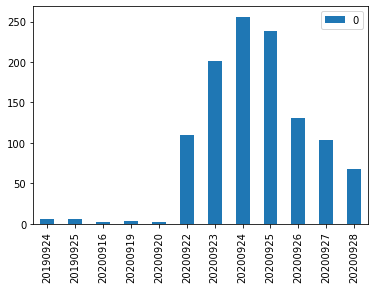

In [71]:
month_data = []

for x in RU_Data.SQLDATE:
    month_data.append(int(x))
    
month_data.sort()
#print(month_data)
    
#month_data.sort()
#print(month_data)
    
from collections import Counter

date_count = Counter(month_data)

xf = pd.DataFrame.from_dict(date_count, orient = 'index')
xf.plot(kind='bar')

In [6]:
religion1 = RU_Data.Actor1Religion1Code
print(religion1.unique())
actorName = RU_Data.Actor1Name
print(actorName.unique())

#PIKE: it looks like in the data, there are two religions for Actor1 (CHR and MOS) and multiple Actor1Names

[nan 'CHR' 'MOS']
[nan 'BUSINESS' 'SOUTH SUDAN' 'UNITED STATES' 'WASHINGTON' 'CHINA'
 'CHINESE' 'REPRESENTATIVES' 'HOSPITAL' 'PRESIDENT' 'MALIAN' 'GOVERNOR'
 'GOVERNMENT' 'NIGER' 'NIGERIA' 'BALA MOHAMMED' 'ISRAEL' 'IVORY COAST'
 'CITIZEN' 'JOURNALIST' 'ABUJA' 'POLICE' 'MAGISTRATE' 'SENATE' 'MINIST'
 'SCHOOL' 'MINIST FOR ENVIRONMENT' 'MINIST OF INTERIOR' 'WEBSITE'
 'NDJAMENA' 'BURKINA FASO' 'COTE DIVOIRE' 'GHANA' 'INDUSTRY' 'NIGERIAN'
 'KATSINA' 'TANZANIA' 'NIGER DELTA' 'THE INTERNATIONAL COMMUNITY' 'RUSSIA'
 'MIGRANT' 'CONAKRY' 'GAMBIA' 'GAMBIAN' 'RETURNEE' 'PALAU' 'NIGERIEN'
 'PRODUCER' 'CHRISTIAN' 'KANO' 'S. AFRICA' 'MINIST FOR FOREIGN'
 'DEFENCE MINIST' 'NATIONAL SECURITY COUNCIL' 'RIGHTS GROUP' 'CAMEROON'
 'CHAD' 'ESTONIA' 'CIVILIAN' 'MILITARY PERSONNEL' 'MILITARY' 'CRIMINAL'
 'BENIN' 'PRINCE' 'STATE GOVERNOR' 'MILITANT' 'WATER MINIST' 'SENEGAL'
 'UNITED NATIONS' 'GENERAL ELECTRIC' 'SECURITY COUNCIL' 'MALI' 'VIETNAM'
 'DEMOCRATIC PARTY' 'DIRECTOR GENERAL' 'HASSAN' 'NIAMEY'
 'MAHAMA

In [7]:
def ref_dict(df):
    cols = list(df)
    ref_dict = {}
    for row in df.iterrows(): 
        ref_dict[row[1][cols[0]]] = row[1][cols[1]]
    
    return ref_dict

In [8]:
#Read in event codes
eventCodes = ref_dict(pd.read_csv("./Ref Codes/CAMEO.eventcodes.txt", sep='\t'))
#Read in Goldsteinscale
goldScale = ref_dict(pd.read_csv("./Ref Codes/CAMEO.goldsteinscale.txt", sep='\t'))
#Read in ethnic groups
ethnicCodes =ref_dict(pd.read_csv("./Ref Codes/CAMEO.ethnic.txt", sep='\t'))
#Read in known Groups
knownGroups = ref_dict(pd.read_csv("./Ref Codes/CAMEO.knowngroup.txt", sep='\t'))
#Read in relgion
religionCodes = ref_dict(pd.read_csv("./Ref Codes/CAMEO.religion.txt", sep='\t'))
#Read in type
typeCodes = ref_dict(pd.read_csv("./Ref Codes/CAMEO.type.txt", sep='\t'))

eventCodes

{1: 'MAKE PUBLIC STATEMENT',
 10: 'DEMAND',
 11: 'DISAPPROVE',
 12: 'REJECT',
 13: 'THREATEN',
 14: 'PROTEST',
 15: 'EXHIBIT FORCE POSTURE',
 16: 'REDUCE RELATIONS',
 17: 'COERCE',
 18: 'ASSAULT',
 19: 'FIGHT',
 2: 'APPEAL',
 20: 'USE UNCONVENTIONAL MASS VIOLENCE',
 21: 'Appeal for material cooperation, not specified below',
 211: 'Appeal for economic cooperation',
 212: 'Appeal for military cooperation',
 213: 'Appeal for judicial cooperation',
 214: 'Appeal for intelligence',
 22: 'Appeal for diplomatic cooperation, such as policy support',
 23: 'Appeal for aid, not specified below',
 231: 'Appeal for economic aid',
 232: 'Appeal for military aid',
 233: 'Appeal for humanitarian aid',
 234: 'Appeal for military protection or peacekeeping',
 24: 'Appeal for political reform, not specified below',
 241: 'Appeal for change in leadership',
 242: 'Appeal for policy change',
 243: 'Appeal for rights',
 244: 'Appeal for change in institutions, regime',
 25: 'Appeal to yield',
 251: 'Appeal 

In [9]:
# Turn colnames into list for ref

cross_ref = list(colnames)

# Create look up table to get values instead of numbers

look_up_code = {"eventCodes": [26,27,28], "goldScale":[30], "ethnicCodes":[9,19], "knownGroups":[8,18], 
                "religionCodes":[10,11,20,21], "typeCodes":[12,13,14,22,23,24]}

In [10]:
'''
Helper function to user can reorient data based on interest from codes

data: Niger_Data - pandas dataframe
ref: key value from look_look_code - string
codebook: reference 
'''

import math

def search_dict(data,ref, codebook):
    res = {}
    look_up = look_up_code[ref]
    col_names = []
    for i in look_up: 
        col_names.append(cross_ref[i])
    
    for col in col_names: 
        for row in data.iterrows(): 
            if isinstance(row[1][col],float):
                #print (type(row[1][col]), col)
                pass
            else: 
                #print (col)
                var = codebook[row[1][col]].upper()
                #print (var, row[1][col])
                if var in res.keys(): 
                    #print(row[1][col])
                    res[var].append(dict(row[1]))
                else: 
                    res[var] = [dict(row[1])]
    return res

In [11]:
res = search_dict(RU_Data, "religionCodes", religionCodes)
res.keys()

dict_keys(['CHRISTIANITY', 'MUSLIM'])

In [12]:
histVal = []
histLabel = []

#verfication to ensure code is working properly
for k,v in res.items(): 
    print (k, ": ", len(v))
    histVal.append(len(v))
    histLabel.append(k)

CHRISTIANITY :  1
MUSLIM :  13


In [18]:
res.items[1].Actor1Name

TypeError: 'builtin_function_or_method' object is not subscriptable

In [19]:
#Put each collection of articles in a Dataframe
list_res = []

for cat in res.values(): 
    #print(cat)
    list_res.append(pd.DataFrame(cat))
    

In [28]:
list_res[1].Actor1Name

0     ISLAMIC RELIEF
1     ISLAMIC RELIEF
2     ISLAMIC RELIEF
3            ISLAMIC
4            ISLAMIC
5              ISLAM
6             POLICE
7             POLICE
8              NIGER
9      UNITED STATES
10               NaN
11             NIGER
12             NIGER
Name: Actor1Name, dtype: object

In [32]:
list_res[1]

,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,20200924,202009,2020,2020.7233,NGOMOSDEV,ISLAMIC RELIEF,NaN,NaN,NaN,MOS,...,NaN,1,Niger,NG,NG,16,8,NG,20200924,https://reliefweb.int/report/world/islamic-rel...
1,20200924,202009,2020,2020.7233,NGOMOSDEV,ISLAMIC RELIEF,NaN,NaN,NaN,MOS,...,NaN,1,Niger,NG,NG,16,8,NG,20200924,https://reliefweb.int/report/world/islamic-rel...
2,20200924,202009,2020,2020.7233,NGOMOSDEV,ISLAMIC RELIEF,NaN,NaN,NaN,MOS,...,NG,1,Niger,NG,NG,16,8,NG,20200924,https://reliefweb.int/report/world/islamic-rel...
3,20200923,202009,2020,2020.7205,MOS,ISLAMIC,NaN,NaN,NaN,MOS,...,FR,4,"Koure, TillabÃÂ©, Niger",NG,NG09,13.3106,2.576,-1083538,20200923,https://www.aljazeera.com/news/2020/08/12/fran...
4,20200923,202009,2020,2020.7205,MOS,ISLAMIC,NaN,NaN,NaN,MOS,...,FR,4,"Koure, TillabÃÂ©, Niger",NG,NG09,13.3106,2.576,-1083538,20200923,https://www.aljazeera.com/news/2020/08/12/fran...
5,20200923,202009,2020,2020.7205,MOS,ISLAM,NaN,NaN,NaN,MOS,...,NaN,4,"Faranah, Faranah, Guinea",GV,GV09,10.0333,-10.7333,-1179584,20200923,https://www.bignewsnetwork.com/news/266483588/...
6,20200928,202009,2020,2020.7342,COPJUD,POLICE,NaN,NaN,NaN,NaN,...,NG,1,Niger,NG,NG,16,8,NG,20200928,https://www.thisdaylive.com/index.php/2020/09/...
7,20200928,202009,2020,2020.7342,COPJUD,POLICE,NaN,NaN,NaN,NaN,...,NG,1,Niger,NG,NG,16,8,NG,20200928,https://www.thisdaylive.com/index.php/2020/09/...
8,20200928,202009,2020,2020.7342,NER,NIGER,NER,NaN,NaN,NaN,...,NG,1,Niger,NG,NG,16,8,NG,20200928,https://www.thisdaylive.com/index.php/2020/09/...
9,20200925,202009,2020,2020.7260,USA,UNITED STATES,USA,NaN,NaN,NaN,...,MR,1,Niger,NG,NG,16,8,NG,20200925,https://allafrica.com/stories/202009250182.html


In [71]:
import matplotlib.pyplot #PIKE: bringing in plotting code

<BarContainer object of 2 artists>

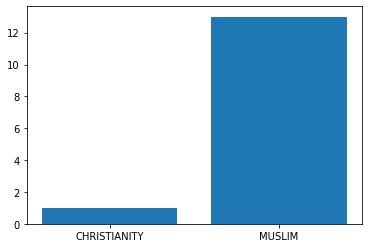

In [86]:
matplotlib.pyplot.bar(histLabel,histVal) #PIKE: running this code plots a bargraph showing there is only 1 Christian
                                            #event and 12 Muslim events